# **1. Perkenalan**
Nama  : Kelompok 2 <br>
Batch : HCK-024

Disclaimer: Proyek ini bertujuan untuk memberikan alternatif bagi konsumen yang ingin mengetahui status halal atau haram suatu bahan makanan berdasarkan informasi yang tersedia. HARAP DICATAT! bahwa proyek ini tidak menggantikan sertifikasi halal resmi dari lembaga yang berwenang, terutama jika kemasan produk tidak mencantumkan logo halal. Beberapa negara mungkin tidak memiliki regulasi atau pengawasan yang ramah terhadap umat Muslim terkait produk halal, sehingga penting bagi konsumen untuk memverifikasi status halal produk tersebut.

**Latar Belakang Masalah** <br>
Bagi umat Muslim, kehalalan makanan adalah aspek yang sangat penting, terutama ketika bepergian ke luar negeri. Banyak konsumen Muslim, terutama wisatawan, menghadapi kesulitan dalam memverifikasi status halal atau haram makanan yang mereka konsumsi, karena banyak produk yang tidak mencantumkan label halal atau informasi yang memadai tentang bahan-bahannya. Menurut sebuah survei, 66% dari wisatawan Muslim di seluruh dunia menyatakan bahwa makanan halal merupakan kekhawatiran utama mereka saat bepergian [https://www.researchgate.net/publication/386503785_Halal_tourism_the_importance_of_halal_food]. Namun, selain ketidakhadiran label halal pada kemasan, masalah lain yang sering dihadapi adalah kurangnya transparansi mengenai asal-usul bahan baku dalam produk makanan. Banyak produk makanan yang tidak menyertakan informasi tentang asal bahan-bahannya, sementara bahan tersembunyi yang tidak tercantum dapat menambah kebingungan. Masalah ini juga sangat dirasakan oleh umat Muslim yang berada di negara-negara dengan komunitas Muslim minoritas, di mana sulit untuk menemukan informasi yang jelas mengenai status halal suatu produk. <br>

Masalah keaslian halal makanan juga semakin mendapat perhatian, karena ada banyak kasus pelanggaran yang melibatkan campuran bahan haram atau mushbooh dalam proses produksi makanan. Ini termasuk penggunaan gelatin dari sumber hewan yang tidak halal, pencemaran dengan alkohol, serta bahan tambahan yang tidak memenuhi kriteria halal, seperti lard atau lemak babi, yang sering ditemukan dalam produk-produk makanan tertentu. Dalam beberapa kasus, bahan haram ini dimasukkan ke dalam makanan untuk tujuan keuntungan ekonomi tanpa mempertimbangkan kepatuhan terhadap hukum Islam.

Dengan meningkatnya kekhawatiran ini, terdapat kebutuhan mendesak untuk mengembangkan solusi teknologi yang dapat membantu konsumen Muslim memverifikasi status halal produk dengan lebih mudah dan efisien. Salah satu pendekatan yang dapat digunakan adalah dengan memanfaatkan teknologi Natural Language Processing (NLP) untuk menganalisis deskripsi produk dalam bentuk teks pada bahan makanan. <br>

- https://www.researchgate.net/publication/285119498_Halal_food_issues_from_Islamic_and_modern_science_perspectives

**Tujuan** <br>
Proyek ini bertujuan untuk menyediakan alternatif yang efektif bagi konsumen Muslim dalam memverifikasi status halal atau haram suatu bahan makanan, khususnya di negara-negara yang tidak sepenuhnya mendukung kebutuhan umat Muslim terkait produk halal. Dengan memanfaatkan teknologi Natural Language Processing (NLP), proyek ini berfokus pada analisis teks yang mengandung informasi terkait bahan makanan, guna mengekstraksi kata-kata kunci yang dapat menunjukkan apakah suatu produk halal atau haram. <br>

Secara lebih spesifik, tujuan utama dari proyek ini adalah:

- Memberikan Alternatif Bagi Konsumen Muslim: Menyediakan alternatif yang memungkinkan konsumen untuk memverifikasi status halal produk makanan, ketika kemasan produk tidak mencantumkan logo halal atau informasi yang memadai mengenai kehalalan produk tersebut.

- Mempermudah Akses Terhadap Informasi Halal: Menyediakan alternatif solusi praktis bagi konsumen di negara-negara yang tidak memiliki regulasi atau pengawasan yang cukup terhadap produk halal sehingga memudahkan mereka. <br>


Catatan Penting: Proyek ini tidak dimaksudkan untuk menggantikan sertifikasi halal resmi dari lembaga yang berwenang, terutama ketika kemasan produk tidak mencantumkan logo halal. Oleh karena itu, meskipun proyek ini bertujuan memberikan rekomendasi berdasarkan analisis teks, konsumen tetap disarankan untuk memverifikasi status halal produk melalui sumber yang dapat dipercaya Dengan penggunaan kata alternatif, ini memberikan penekanan bahwa proyek ini adalah solusi tambahan yang memudahkan konsumen dalam menentukan status halal suatu produk.

# **2. Import Libraries**

In [1]:
import re
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, Dense, Attention
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow.keras.layers import MultiHeadAttention, Flatten


# Download stopwords jika belum ada
nltk.download('stopwords')
nltk.download('wordnet')

# Download NLTK resources
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rizkystiawanp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rizkystiawanp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rizkystiawanp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rizkystiawanp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **3. Data Loading**

In [2]:
df = pd.read_csv('cleaned_dataset.csv')
df

,text,label
0,vegetable oil,halal
1,beef stock contains less than of mirepoix carr...,halal
2,clam stock potatoes clams cream vegetable oil ...,haram
3,water cream broccoli celery vegetable oil corn...,haram
4,chicken stock contains less than of yeast extr...,halal
...,...,...
39782,milk chocolate sugar cocoa butter chocolate sk...,halal
39783,enriched wheat flour unbleached flour niacin i...,halal
39784,rice garlic artichokes parsley sulphites,halal
39785,enriched bleached flour wheat flour niacin red...,halal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39787 entries, 0 to 39786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39787 non-null  object
 1   label   39787 non-null  object
dtypes: object(2)
memory usage: 621.8+ KB


In [4]:
df.duplicated().sum()

214

Tidak ada duplikat pada dataset ini

In [5]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Dark2', low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,text,object,0,0.000000
1,label,object,0,0.000000


In [6]:
df = df.dropna()

In [7]:
df.columns

Index(['text', 'label'], dtype='object')

In [8]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

text: 39573 distinct values
label: 2 distinct values


# **4. EDA**

## **4.1 Word Cloud**

In [9]:
df

,text,label
0,vegetable oil,halal
1,beef stock contains less than of mirepoix carr...,halal
2,clam stock potatoes clams cream vegetable oil ...,haram
3,water cream broccoli celery vegetable oil corn...,haram
4,chicken stock contains less than of yeast extr...,halal
...,...,...
39782,milk chocolate sugar cocoa butter chocolate sk...,halal
39783,enriched wheat flour unbleached flour niacin i...,halal
39784,rice garlic artichokes parsley sulphites,halal
39785,enriched bleached flour wheat flour niacin red...,halal


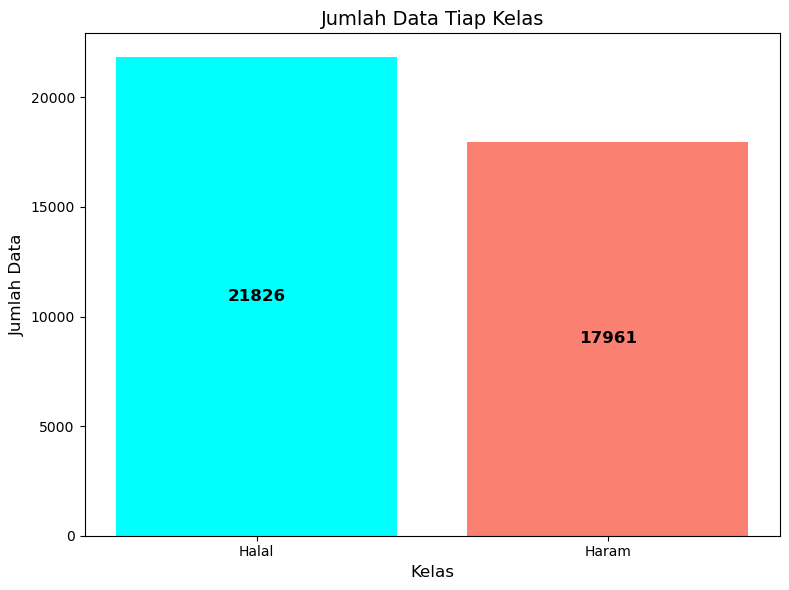

In [10]:
# Menghitung jumlah data tiap kelas
class_counts = df['label'].value_counts()

# Plot grafik dengan warna khusus
plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=['aqua', 'salmon'])

# Tambahkan nilai di dalam setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, int(yval),  # Posisi teks di tengah bar
             ha='center', va='center', fontsize=12, fontweight='bold', color='black')


# Label dan judul grafik
plt.title('Jumlah Data Tiap Kelas', fontsize=14)
plt.xlabel('Kelas', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Halal', 'Haram'], rotation=0)
plt.tight_layout()

# Tampilkan grafik
plt.show()


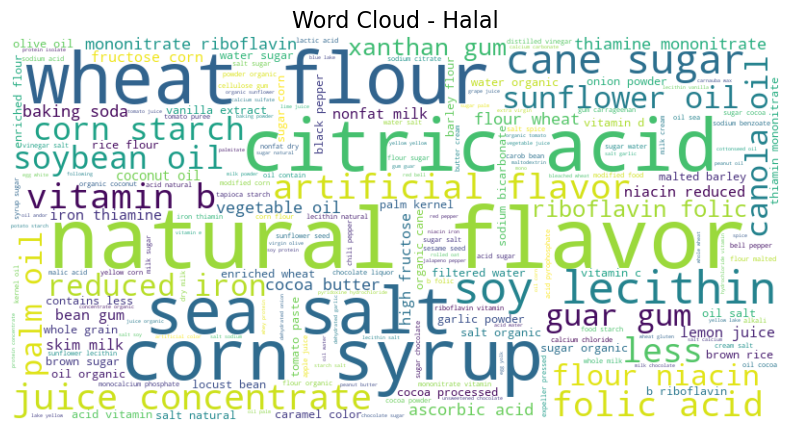

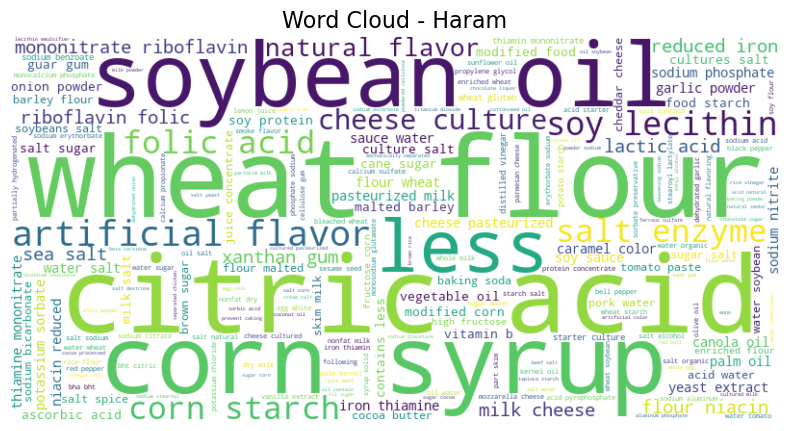

In [11]:
stopwords = set(STOPWORDS)

# Fungsi untuk membuat Word Cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {title}', fontsize=16)
    plt.show()

# Word cloud untuk kategori Halal
generate_wordcloud(df[df["label"] == "halal"]["text"], 'Halal')

# Word cloud untuk kategori Haram
generate_wordcloud(df[df["label"] == "haram"]["text"], 'Haram')


Beberapa kata yang mendominasi dalam gambar ini Word Cloud Halal adalah:

- wheat flour (tepung gandum)
- citric acid (asam sitrat)
- natural flavor (perisa alami)
- corn syrup (sirup jagung)
- sea salt (garam laut)
- soy (kedelai)
- lecithin
- folic acid

Dari hasil ini, terlihat bahwa banyak bahan halal yang merupakan bahan umum dalam makanan seperti pemanis, garam, dan perisa alami.

Word Cloud untuk bahan-bahan haram, terdapat beberapa kata yang menonjol adalah:

- soybean oil (minyak kedelai)
- wheat flour (tepung gandum)
- citric acid (asam sitrat)
- corn syrup (sirup jagung)
- artificial flavor (perisa buatan)
- cheese cultures (kultur keju)
- enzyme
- lactic acid
Dibandingkan dengan word cloud halal, ada beberapa kemiripan dalam bahan seperti tepung gandum, asam sitrat, sirup jagung, dan perisa buatan. Namun, bahan seperti cheese cultures, enzyme, dan lactic acid lebih menonjol dalam daftar haram, mungkin karena berasal dari hewan atau fermentasi yang belum jelas kehalalannya.

# **5. Feature Engineering**

## **5.1  Preprocessing**

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords jika belum ada
nltk.download('stopwords')
nltk.download('wordnet')

# Inisialisasi Lemmatizer & Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # ✅ FIXED: Tidak perlu .words()

def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization & Stopwords removal
    return ' '.join(words)

# Apply preprocessing
df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rizkystiawanp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rizkystiawanp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Daftar kata tambahan yang penting untuk klasifikasi Haram
extra_words = ['pork', 'gelatin', 'alcohol', 'lard', 'bacon', 'rum', 'yeast extract', 
               'ham', 'pepperoni', 'fatty', 'shortening', 'meat', 'pig', 'wine', 'beer']

# Inisialisasi Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')

# Fit tokenizer ke teks dataset
tokenizer.fit_on_texts(df['clean_text'])

# Tambahkan kata-kata Haram secara manual ke tokenizer
for word in extra_words:
    if word not in tokenizer.word_index:
        tokenizer.word_index[word] = len(tokenizer.word_index) + 1

# Konversi teks menjadi sequences setelah tokenizer diperbaiki
sequences = tokenizer.texts_to_sequences(df['clean_text'])

# Padding sequences agar panjangnya seragam
max_length = 100
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_length)

# Cek apakah kata-kata tambahan sudah masuk ke tokenizer
for word in extra_words:
    print(f"{word}: {tokenizer.word_index.get(word, 'Not Found')}")


pork: 56
gelatin: 249
alcohol: 109
lard: 799
bacon: 308
rum: 1308
yeast extract: 9984
ham: 501
pepperoni: 290
fatty: 338
shortening: 212
meat: 202
pig: 3681
wine: 203
beer: 748


## **5.2 Target Conversion**

In [14]:
# Convert target labels to numerical values
df['label'] = df['label'].replace({'halal': 1, 'haram': 0})
labels = df['label'].values

In [15]:
# Handle class imbalance using class weighting
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

## **5.3 Split Data**

In [16]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert labels to One Hot Encoding
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)


## **5.4 Load Pre-trained GloVe Embeddings**

In [17]:
# Load GloVe Embeddings
embedding_dim = 100
embedding_index = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coef = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coef

# Create Embedding Matrix
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in embedding_index:
        embedding_matrix[i] = embedding_index[word]


# **6. Model Training**

## **vi. 1. Model Definition**

In [18]:
# Define LSTM Model with Multi-Head Attention & Sigmoid (Fine-Tuned)
input_layer = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=len(word_index) + 1, 
                            output_dim=embedding_dim, 
                            weights=[embedding_matrix], 
                            input_length=max_length, 
                            trainable=False)(input_layer)

# ✅ LSTM pertama untuk menangkap pola sekuensial
lstm_output = LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)(embedding_layer)

# ✅ Multi-Head Attention untuk menangkap hubungan antar kata
attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(lstm_output, lstm_output)

# ✅ Flatten untuk merapikan output Attention sebelum masuk ke LSTM berikutnya
attention_flatten = Flatten()(attention_output)

# ✅ LSTM kedua untuk pemrosesan lebih dalam
lstm_output2 = LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)(embedding_layer)

# ✅ Dropout untuk mengurangi overfitting
dropout_layer = Dropout(0.5)(lstm_output2)

# ✅ Dense layer sebagai fully connected layer
dense_layer = Dense(64, activation='relu')(dropout_layer)

# ✅ Output layer dengan sigmoid untuk klasifikasi biner
output_layer = Dense(1, activation='sigmoid')(dense_layer)

# Define Model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile Model dengan learning rate lebih kecil untuk stabilitas
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Show Model Summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 100)          998500    
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1044965 (3.99 MB)
Trainable params: 46465 (181.

## **vi. 2. Model Training**

In [19]:
# Define Model Training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,  # Pastikan y_train berbentuk (None,) bukan one-hot encoding
    validation_data=(X_val, y_val),
    epochs=30,  # Bisa ditambah jika model masih underfitting
    batch_size=32,  # Bisa dicoba batch_size 64 jika ingin lebih cepat
    class_weight=class_weight_dict,  # Menyeimbangkan distribusi kelas
    callbacks=[early_stopping]  # Menghentikan training jika tidak ada peningkatan
)


Epoch 1/30
995/995 [==============================] - 43s 42ms/step - loss: 0.4748 - accuracy: 0.7690 - val_loss: 0.3897 - val_accuracy: 0.8351
Epoch 2/30
995/995 [==============================] - 41s 41ms/step - loss: 0.3155 - accuracy: 0.8698 - val_loss: 0.2062 - val_accuracy: 0.9208
Epoch 3/30
995/995 [==============================] - 41s 41ms/step - loss: 0.2452 - accuracy: 0.9056 - val_loss: 0.1674 - val_accuracy: 0.9412
Epoch 4/30
995/995 [==============================] - 41s 41ms/step - loss: 0.2067 - accuracy: 0.9263 - val_loss: 0.1478 - val_accuracy: 0.9497
Epoch 5/30
995/995 [==============================] - 41s 41ms/step - loss: 0.1860 - accuracy: 0.9353 - val_loss: 0.1621 - val_accuracy: 0.9462
Epoch 6/30
995/995 [==============================] - 41s 41ms/step - loss: 0.1690 - accuracy: 0.9439 - val_loss: 0.1128 - val_accuracy: 0.9615
Epoch 7/30
995/995 [==============================] - 41s 41ms/step - loss: 0.1452 - accuracy: 0.9519 - val_loss: 0.1088 - val_accuracy:

## **vi. 3. Model Evaluation**

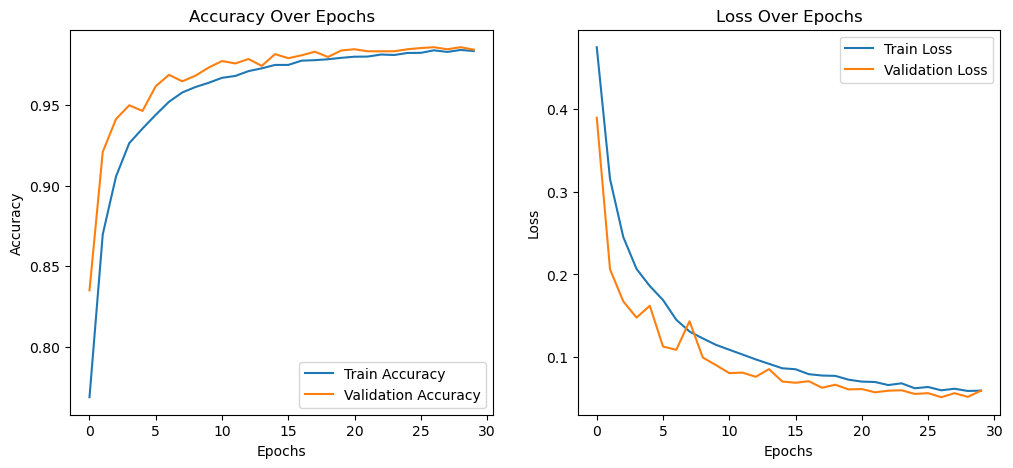

125/125 [==============================] - 1s 6ms/step


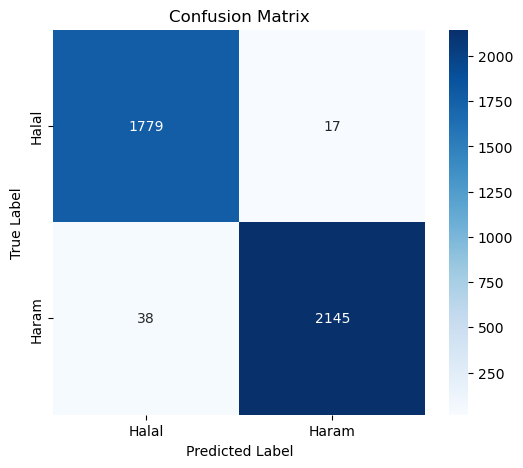

Classification Report:
               precision    recall  f1-score   support

       Halal       0.98      0.99      0.98      1796
       Haram       0.99      0.98      0.99      2183

    accuracy                           0.99      3979
   macro avg       0.99      0.99      0.99      3979
weighted avg       0.99      0.99      0.99      3979



In [20]:
# Plot akurasi dan loss
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Grafik akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')

    # Grafik loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Over Epochs')

    plt.show()

# Tampilkan grafik
plot_history(history)
# Prediksi label untuk test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Konversi probabilitas ke 0 atau 1

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Halal', 'Haram'], yticklabels=['Halal', 'Haram'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred, target_names=['Halal', 'Haram'])
print("Classification Report:\n", report)


# **8. Model Saving**

In [21]:
# Save Model Setelah Training
model.save("halal_haram_lstm_finetuned_model.h5")
print("Model successfully saved!")

# Save Tokenizer
tokenizer_save_path = "tokenizer.pkl"
with open(tokenizer_save_path, 'wb') as file:
    pickle.dump(tokenizer, file)

print("Tokenizer successfully saved!")

Model successfully saved!
Tokenizer successfully saved!


/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
# # Model Saving
# model_save_path = "sentiment_analysis_model.h5"
# model_improved.save(model_save_path)
# print(f'Model saved at {model_save_path}')

In [23]:
# # Menyimpan tokenizer ke file
# with open('tokenizer.pkl', 'wb') as file:
#     pickle.dump(tokenizer, file)

# print("Tokenizer berhasil disimpan sebagai 'tokenizer.pkl'")


# **9. Model Inference**

Model Inference dibuat di file ipynb baru

# **10. Kesimpulan**

✅ Dataset Halal-Haram berhasil digunakan untuk model NLP. <br>
✅ LSTM Model telah dibuat untuk klasifikasi halal-haram. <br>
✅ Model telah diuji, divisualisasikan, dan disimpan. <br>
✅ Prediksi dapat dilakukan untuk data baru. <br>

# **11. Future Improvement**

- Training dataset menjadi 3 kategor halal, haram, syuhbat.